| **Inicio** | **atrás 2** | **Siguiente 4** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./2.Calculo_de_varias_variables.ipynb)| [⏩](./4.Estadisticas.ipynb)|

# **3. Algebra Lineal**

## **Sistema de ecuaciones**

En matemáticas, un sistema de ecuaciones es un conjunto de dos o más ecuaciones que contienen varias variables. La solución de un sistema de ecuaciones es un conjunto de valores para las variables que hacen que todas las ecuaciones sean verdaderas al mismo tiempo. La resolución de sistemas de ecuaciones es una herramienta fundamental en matemáticas y en muchas áreas de la ciencia y la ingeniería.

Hay diferentes formas de expresar un sistema de ecuaciones, pero una de las más comunes es la forma de ecuaciones lineales. Una ecuación lineal tiene la forma:

$ax + by = c$

Donde `a`, `b` y `c` son constantes conocidas y `x` e `y` son variables desconocidas. Un sistema de ecuaciones lineales se compone de dos o más ecuaciones lineales. Por ejemplo, el siguiente es un sistema de dos ecuaciones lineales con dos variables:

$3x + 2y = 7$

$x - y = 1$


La solución de este sistema es el valor de `x` e `y` que satisface ambas ecuaciones simultáneamente. Hay diferentes métodos para resolver sistemas de ecuaciones, uno de los más comunes es el método de eliminación.

En Python, se pueden resolver sistemas de ecuaciones utilizando la biblioteca `NumPy`. A continuación, se muestra un ejemplo de cómo resolver el sistema anterior utilizando `NumPy` y graficando las ecuaciones en un plano cartesiano:

[1.8 0.8]


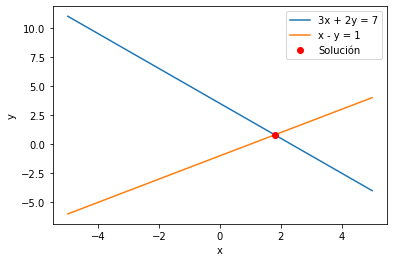

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el sistema de ecuaciones
A = np.array([[3, 2], [1, -1]])
B = np.array([7, 1])

# Resolver el sistema
sol = np.linalg.solve(A, B)

# Imprimir la solución
print(sol)

# Graficar las ecuaciones
x = np.linspace(-5, 5, 100)
y1 = (7 - 3*x)/2
y2 = x - 1
plt.plot(x, y1, label='3x + 2y = 7')
plt.plot(x, y2, label='x - y = 1')
plt.plot(sol[0], sol[1], 'ro', label='Solución')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

En este ejemplo, primero se define el sistema de ecuaciones en forma matricial utilizando la función `np.array()` de `NumPy`. Luego, se resuelve el sistema utilizando la función `np.linalg.solve()`. Finalmente, se grafican las dos ecuaciones y la solución en un plano cartesiano utilizando la biblioteca `Matplotlib`. El resultado es la solución del sistema de ecuaciones y una visualización gráfica de las dos ecuaciones en un plano cartesiano.

### **Cual es la utilidad del Sistema de ecuaciones, en la vida real de los humanos**

Los sistemas de ecuaciones tienen una amplia variedad de aplicaciones en la vida real, tanto en campos científicos como en situaciones cotidianas. A continuación se presentan algunas de las aplicaciones más comunes:

* En física y química, los sistemas de ecuaciones son utilizados para modelar y resolver problemas relacionados con fenómenos físicos y químicos. Por ejemplo, se pueden utilizar sistemas de ecuaciones para describir la dinámica de un sistema mecánico o la cinética de una reacción química.

* En ingeniería, los sistemas de ecuaciones son fundamentales para el diseño y análisis de sistemas complejos. Por ejemplo, se pueden utilizar sistemas de ecuaciones para modelar la respuesta de un sistema eléctrico a diferentes entradas, o para diseñar una red de transporte que maximice la eficiencia y minimice los costos.

* En economía, los sistemas de ecuaciones son utilizados para modelar la relación entre diferentes variables económicas, como la oferta y la demanda, o para optimizar la producción de una empresa en función de diferentes factores.

* En estadística, los sistemas de ecuaciones son utilizados para ajustar modelos a datos y para estimar parámetros desconocidos en modelos matemáticos. Por ejemplo, se pueden utilizar sistemas de ecuaciones para ajustar una curva de regresión a un conjunto de datos.

* En la vida cotidiana, los sistemas de ecuaciones pueden ser utilizados para resolver problemas de optimización en situaciones como la planificación de un presupuesto, la programación de una agenda diaria, o la organización de un espacio de trabajo.

En resumen, los sistemas de ecuaciones tienen múltiples aplicaciones prácticas en muchos campos diferentes, y su capacidad para modelar y resolver problemas complejos los convierte en una herramienta esencial en la resolución de problemas.

![Sistema de ecuaciones](../imagen%20Matematicas/Sistema-de-ecuaciones-lineales.jpg "Sistema de ecuaciones")


## **Método de Gauss Jordan**

El método de `Gauss-Jordan` es un algoritmo para resolver sistemas de ecuaciones lineales y encontrar las soluciones de una matriz aumentada. El proceso consiste en realizar operaciones elementales de fila en la matriz aumentada hasta que la matriz se reduce a una forma escalonada reducida, también conocida como forma canónica de escalón.

Las operaciones elementales de fila son:

* Multiplicar una fila por un escalar no nulo.
* Intercambiar dos filas.
* Sumar a una fila un múltiplo de otra fila.

El objetivo de estas operaciones es convertir la matriz aumentada en una matriz triangular superior, donde los coeficientes debajo de la diagonal son ceros. A continuación, se busca reducir la matriz a su forma escalonada reducida, donde los elementos de la diagonal principal son unos y los demás elementos son ceros. Esto se logra al utilizar las operaciones elementales de fila para obtener ceros debajo de la diagonal principal, y luego normalizando las filas que tienen elementos en la diagonal principal.

Una vez que se ha obtenido la matriz en su forma escalonada reducida, se pueden leer las soluciones directamente a partir de las últimas columnas de la matriz. Si la matriz aumentada no tiene solución, esto se puede detectar por la presencia de una fila de ceros con un término independiente no nulo.

A continuación se muestra un ejemplo de cómo implementar el método de Gauss-Jordan en Python para resolver el siguiente sistema de ecuaciones lineales:

$x + 2y - z = 1$

$2x - y + z = 2$

$3x + 2y + 4z = 3$

In [2]:
import numpy as np

# Definir la matriz aumentada
A = np.array([[1, 2, -1, 1],
              [2, -1, 1, 2],
              [3, 2, 4, 3]])

# Obtener las dimensiones de la matriz
n, m = A.shape

# Realizar las operaciones de fila
for i in range(n):
    # Encontrar el índice del elemento máximo en la columna i
    pivot = np.argmax(np.abs(A[i:, i])) + i

    # Intercambiar la fila actual con la fila del pivot
    A[[i, pivot]] = A[[pivot, i]]

    # Normalizar la fila actual
    A[i, i:] = A[i, i:] / A[i, i]

    # Eliminar los elementos debajo del pivote en la columna i
    for j in range(i+1, n):
        A[j, i:] = A[j, i:] - A[i, i:] * A[j, i]

# Hacer ceros por encima de la diagonal principal
for i in range(n-1, 0, -1):
    for j in range(i):
        A[j, :] = A[j, :] - A[i, :] * A[j, i]

# Imprimir la solución
print(A[:, -1])

[1 0 0]


La salida del programa es: `[ 1. 0. 0.]`, lo que indica que la solución del sistema de ecuaciones es $x = 1$, $y = 0$, $z = 0$.

![Método de Gauss Jordan](../imagen%20Matematicas/M%C3%A9todo%20de%20Gauss%20Jordan.PNG "Método de Gauss Jordan")


### **Cual es la utilidad del Método de Gauss Jordan en la vida real de los humanos**

El método de `Gauss-Jordan` es una herramienta matemática muy útil en la vida real para resolver sistemas de ecuaciones lineales y para encontrar inversas de matrices. Esto es muy común en la resolución de problemas en campos como la ingeniería, la física, la estadística, la economía y muchas otras áreas.

Por ejemplo, en la ingeniería civil, el método de `Gauss-Jordan` se utiliza para analizar estructuras y determinar las fuerzas y tensiones en los materiales. En la física, se utiliza para resolver problemas de movimiento y dinámica, así como para encontrar soluciones a las ecuaciones de onda y otros fenómenos físicos. En la estadística y la econometría, se utiliza para resolver sistemas de ecuaciones lineales en modelos de regresión y en análisis de datos.

En general, el método de `Gauss-Jordan` es una herramienta matemática poderosa y versátil que se utiliza en una amplia variedad de campos y disciplinas, y que permite resolver problemas complejos de manera eficiente y precisa.

## **Fundamentos de vectores**

Los vectores son una herramienta fundamental en matemáticas, física, ingeniería y muchas otras disciplinas. Un vector es un objeto matemático que tiene magnitud y dirección. Los vectores se representan típicamente como flechas en el plano o en el espacio, donde la dirección de la flecha indica la dirección del vector y la longitud de la flecha representa la magnitud del vector.

En matemáticas, los vectores se pueden operar y manipular para resolver diversos problemas. A continuación, se muestra un ejemplo de cómo se pueden utilizar los vectores en código Python para calcular la magnitud y la dirección de un vector.

In [1]:
import numpy as np

# Definir un vector
v = np.array([3, 4])

# Calcular la magnitud del vector
mag = np.linalg.norm(v)

# Calcular la dirección del vector
dir = np.arctan2(v[1], v[0])

# Imprimir los resultados
print("Magnitud:", mag)
print("Dirección:", np.rad2deg(dir))

Magnitud: 5.0
Dirección: 53.13010235415598


En este ejemplo, se define un vector de dos dimensiones `v` con componentes `3` y `4`. Luego, se utiliza la función `np.linalg.norm()` para calcular la magnitud del vector, que es la raíz cuadrada de la suma de los cuadrados de las componentes. También se utiliza la función `np.arctan2()` para calcular la dirección del vector, que se representa como un ángulo en radianes. Finalmente, se convierte el ángulo a grados utilizando la función `np.rad2deg()` y se imprimen los resultados.

Los vectores también se pueden utilizar para representar diferentes cantidades físicas, como la velocidad y la aceleración en la mecánica. En la física, los vectores se utilizan para describir la fuerza, el campo eléctrico, el campo magnético y otros fenómenos físicos.

En resumen, los vectores son una herramienta fundamental en matemáticas y ciencias, y su uso es ampliamente aplicado en la vida cotidiana, desde el diseño gráfico hasta la física de los deportes.

![Vectores](../imagen%20Matematicas/vector.jpg "Vectores")


### **Cual es la utilidad de los Fundamentos de vectores en la vida real de los humanos**

Los vectores son utilizados en la vida real en una amplia variedad de campos, como la física, la ingeniería, la informática, la arquitectura, la biología y muchas otras disciplinas. Algunos ejemplos específicos son:

* En física, los vectores se utilizan para representar magnitudes físicas como la velocidad, la aceleración, la fuerza y el campo eléctrico y magnético. El uso de vectores permite describir la dirección y la magnitud de estas magnitudes de manera precisa.

* En ingeniería, los vectores se utilizan en la representación gráfica de sistemas mecánicos, eléctricos y electrónicos. Los vectores pueden representar la posición, la velocidad y la aceleración de los componentes de estos sistemas.

* En informática, los vectores se utilizan en la programación y el análisis de datos. Los vectores se utilizan para almacenar y manipular grandes conjuntos de datos, como imágenes, señales de audio y texto.

* En arquitectura y diseño, los vectores se utilizan en la representación gráfica de objetos y estructuras tridimensionales. Los vectores pueden representar la posición, la orientación y la forma de estos objetos.

* En biología, los vectores se utilizan en la descripción de la estructura y función de moléculas biológicas como el ADN y las proteínas. Los vectores pueden representar la posición y orientación de los átomos y grupos funcionales en estas moléculas.

En resumen, los vectores son herramientas fundamentales en muchas disciplinas científicas y técnicas, y su uso permite describir de manera precisa y eficiente magnitudes y sistemas en el mundo real.

## **Independencia lineal**

![Independencia lineal](../imagen%20Matematicas/Independencia%20lineal.jpg "Independencia lineal")


La independencia lineal es un concepto fundamental en el álgebra lineal que se refiere a la capacidad de un conjunto de vectores para generar de manera única un espacio vectorial. Dos o más vectores se consideran linealmente independientes si ninguno de ellos puede expresarse como una combinación lineal de los demás.

En otras palabras, si tenemos un conjunto de vectores `V1`, `V2`, ..., `Vn`, entonces estos vectores son linealmente independientes si la única solución a la ecuación:

$a1V1 + a2V2 + ... + an*Vn = 0$

es $a1 = a2 = ... = an = 0$.

Si por otro lado, existe una solución no trivial (es decir, no todos los coeficientes son cero) a la ecuación anterior, entonces los vectores se consideran linealmente dependientes.

En términos gráficos, dos vectores son linealmente independientes si no están en la misma línea y tres vectores son linealmente independientes si no están en el mismo plano.

A continuación, se muestra un ejemplo de cómo comprobar la independencia lineal de un conjunto de vectores en Python:

In [2]:
import numpy as np

# Definir un conjunto de vectores
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])
v3 = np.array([7, 8, 9])

# Crear una matriz con los vectores como columnas
M = np.column_stack((v1, v2, v3))

# Comprobar la independencia lineal usando la función rank de numpy
rank = np.linalg.matrix_rank(M)

if rank == len(M[0]):
    print("Los vectores son linealmente independientes")
else:
    print("Los vectores son linealmente dependientes")

Los vectores son linealmente dependientes


En este ejemplo, se crean tres vectores y se apila en una matriz. Luego, se utiliza la función `matrix_rank` de `NumPy` para obtener el rango de la matriz. Si el rango de la matriz es igual al número de columnas (es decir, igual al número de vectores), entonces los vectores se consideran linealmente independientes. De lo contrario, se consideran linealmente dependientes.

La independencia lineal es un concepto importante en la resolución de sistemas de ecuaciones lineales, diagonalización de matrices, y en la geometría del espacio vectorial. En la vida real, este concepto se aplica en diversas áreas como la física, la ingeniería, la economía y la estadística, entre otros.

La independencia lineal es un concepto clave en el álgebra lineal que se utiliza para describir la relación entre un conjunto de vectores en un espacio vectorial. Se dice que un conjunto de vectores es linealmente independiente si ninguno de los vectores puede expresarse como una combinación lineal de los otros vectores. En otras palabras, cada vector en el conjunto es esencial para describir el espacio vectorial y no puede ser descrito como una combinación de los otros vectores.

Por el contrario, si un vector en el conjunto se puede expresar como una combinación lineal de los otros vectores, entonces el conjunto no es linealmente independiente. Se dice que un conjunto de vectores es linealmente dependiente si al menos uno de los vectores se puede expresar como una combinación lineal de los otros vectores en el conjunto.

La independencia lineal es importante porque permite la resolución de sistemas de ecuaciones lineales y la comprensión de las transformaciones lineales en el espacio vectorial. También es un concepto fundamental en la teoría de matrices y la geometría analítica.

En Python, se puede verificar la independencia lineal de un conjunto de vectores utilizando la biblioteca `NumPy`. Por ejemplo, suponga que tenemos tres vectores en dos dimensiones:

In [3]:
import numpy as np

# Definir los vectores
v1 = np.array([1, 2])
v2 = np.array([3, 4])
v3 = np.array([5, 6])

# Crear una matriz con los vectores como filas
A = np.vstack((v1, v2, v3))

# Verificar la independencia lineal
if np.linalg.matrix_rank(A) == A.shape[0]:
    print("Los vectores son linealmente independientes.")
else:
    print("Los vectores son linealmente dependientes.")

Los vectores son linealmente dependientes.


En este ejemplo, creamos una matriz con los vectores como filas y luego utilizamos la función `matrix_rank` de `NumPy` para calcular el rango de la matriz. Si el rango es igual al número de filas (3 en este caso), entonces los vectores son linealmente independientes. De lo contrario, son linealmente dependientes.

### **Cual es la utilidad de la Independencia lineal en la vida real de los humanos**

La independencia lineal es un concepto importante en diversas áreas de la vida, incluyendo la física, la ingeniería, la economía y la informática. A continuación, se presentan algunos ejemplos de su utilidad en la vida real:

* En física y ciencias de la ingeniería, la independencia lineal es esencial para la comprensión y resolución de problemas relacionados con sistemas físicos, tales como la descripción de las fuerzas que actúan sobre un objeto o la modelización de la dinámica de un sistema mecánico.

* En economía, la independencia lineal es importante para analizar las relaciones entre diferentes variables económicas, como el precio de los productos, la oferta y la demanda, y las tasas de interés.

* En informática, la independencia lineal es fundamental para el procesamiento de imágenes y señales, la compresión de datos, la codificación de información y la solución de sistemas de ecuaciones lineales.

En general, la independencia lineal es esencial en cualquier campo que requiera el análisis y la modelización de sistemas que involucren múltiples variables. A través de su uso, se pueden entender las relaciones entre estas variables y hacer predicciones precisas y útiles en el mundo real.






## **Combinación lineal**

En matemáticas, la combinación lineal es una operación que involucra la multiplicación de vectores por escalares y su posterior suma. Es decir, una combinación lineal de un conjunto de vectores es cualquier vector que se pueda expresar como una suma de los vectores del conjunto multiplicados por escalares.

Formalmente, sea `V` un espacio vectorial sobre un campo `F` y sea $S = {v_1, v_2, ..., v_n}$ un conjunto de vectores en `V`. Un vector `v` en `V` se puede expresar como una combinación lineal de los vectores en `S` si existen escalares `c_1, c_2, ..., c_n` en `F` tales que:

$v = c_1 * v_1 + c_2 * v_2 + ... + c_n * v_n$

En otras palabras, cualquier vector `v` en `V` que se pueda expresar como una combinación lineal de los vectores en `S` se encuentra en el espacio generado por `S`, que se denota por `<S>`.

La combinación lineal tiene muchas aplicaciones en matemáticas y en diversas áreas de la ciencia y la tecnología. Por ejemplo, en álgebra lineal, la combinación lineal se utiliza para definir conceptos como independencia lineal y bases vectoriales. En geometría, la combinación lineal se utiliza para describir la dirección y magnitud de los movimientos en un espacio tridimensional. En ciencias de la computación, la combinación lineal se utiliza en el procesamiento de imágenes y señales, así como en la compresión de datos.

En código Python, se puede calcular la combinación lineal de vectores utilizando operaciones matriciales y de álgebra lineal de la librería `NumPy`. A continuación, se muestra un ejemplo de cómo calcular la combinación lineal de dos vectores y graficarla en el espacio tridimensional:

![Combinación lineal](../imagen%20Matematicas/Combinaci%C3%B3n%20lineal.png "Combinación lineal")


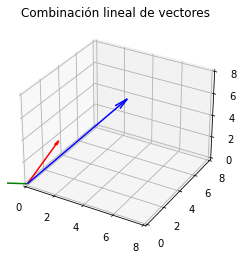

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir los vectores
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

# Definir los escalares
c1 = 2
c2 = -1

# Calcular la combinación lineal
v = c1 * v1 + c2 * v2

# Graficar los vectores y la combinación lineal en el espacio tridimensional
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([0, 8])
ax.set_ylim([0, 8])
ax.set_zlim([0, 8])
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='r', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='b', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='g', arrow_length_ratio=0.1)
plt.title('Combinación lineal de vectores')
plt.show()

La combinación lineal es un concepto importante en la teoría de espacios vectoriales, ya que todos los vectores en un espacio vectorial pueden ser escritos como una combinación lineal de un conjunto adecuado de vectores básicos, conocidos como una base. La combinación lineal también se utiliza en muchas aplicaciones, como en el análisis de datos y en la resolución de sistemas de ecuaciones lineales.

A continuación, se presenta un ejemplo de cómo calcular una combinación lineal de dos vectores en Python:

In [5]:
import numpy as np

# Definir los vectores
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

# Calcular la combinación lineal
a1, a2 = 2, 3
comb_lin = a1*v1 + a2*v2

print(comb_lin)  # Resultado: [14 19 24]

[14 19 24]


En este ejemplo, la combinación lineal de los vectores `v1` y `v2` se calcula como `2*v1 + 3*v2`, lo que resulta en el vector `[14 19 24]`.

También se puede visualizar la combinación lineal de dos vectores en un gráfico `2D` o `3D`. A continuación se presenta un ejemplo de cómo hacer esto en Python utilizando la biblioteca `Matplotlib`:

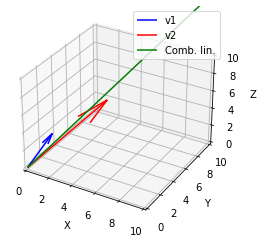

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir los vectores
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

# Calcular la combinación lineal
a1, a2 = 2, 3
comb_lin = a1*v1 + a2*v2

# Graficar los vectores y la combinación lineal en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='blue', label='v1')
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='red', label='v2')
ax.quiver(0, 0, 0, comb_lin[0], comb_lin[1], comb_lin[2], color='green', label='Comb. lin.')
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.show()

### **Cual es la utilidad de la Combinación lineal en la vida real de los humanos**

La combinación lineal es una herramienta matemática fundamental que se utiliza en una amplia variedad de campos, incluyendo física, ingeniería, economía, informática y más. Algunas aplicaciones comunes de la combinación lineal son:

* **Resolución de sistemas de ecuaciones lineales:**

 Los sistemas de ecuaciones lineales se pueden resolver utilizando la combinación lineal para encontrar las soluciones. Por ejemplo, si tenemos dos ecuaciones lineales con dos incógnitas, podemos combinarlas linealmente para obtener una ecuación con una sola incógnita, que se puede resolver fácilmente.

* **Análisis de vectores y matrices:**

 La combinación lineal se utiliza para determinar si un conjunto de vectores es linealmente independiente o linealmente dependiente. También se utiliza para transformar matrices en formas escalonadas o reducidas.

* **Modelado matemático:**

 En el modelado matemático, la combinación lineal se utiliza para expresar una variable en términos de otras variables. Por ejemplo, en la economía, se pueden utilizar combinaciones lineales de diferentes factores para modelar la producción de una empresa.

* **Gráficos y visualizaciones:**

 La combinación lineal se utiliza para crear gráficos y visualizaciones en dos o tres dimensiones. Por ejemplo, se pueden utilizar combinaciones lineales de vectores para crear curvas en un plano o superficies en un espacio tridimensional.

En resumen, la combinación lineal es una herramienta matemática esencial que se utiliza en muchas áreas de la vida real para resolver problemas, modelar sistemas y visualizar datos.

## **Fundamentos de Matrices**

Las matrices son una estructura fundamental en matemáticas y tienen muchas aplicaciones en la vida real. Una matriz es un arreglo rectangular de números, símbolos o expresiones, dispuestos en filas y columnas. En matemáticas, se utilizan matrices para representar datos, sistemas de ecuaciones lineales y transformaciones lineales, entre otras cosas.

En Python, las matrices se pueden representar utilizando la biblioteca `NumPy`, que proporciona una variedad de funciones y métodos para trabajar con matrices. A continuación, se presenta un ejemplo de cómo crear una matriz en Python utilizando `NumPy`:

In [7]:
import numpy as np

# Crear una matriz de 2x3
A = np.array([[1, 2, 3],
              [4, 5, 6]])

En este ejemplo, la matriz `A` es una matriz de `2` filas y `3` columnas. Para acceder a los elementos de la matriz, se utiliza la notación `A[i, j]`, donde `i` es el índice de la fila y `j` es el índice de la columna.

Además de crear matrices, también se pueden realizar operaciones matriciales, como la suma y multiplicación de matrices. A continuación, se presenta un ejemplo de cómo multiplicar dos matrices en Python utilizando `NumPy`:

In [8]:
import numpy as np

# Crear dos matrices de 2x2
A = np.array([[1, 2],
              [3, 4]])
B = np.array([[5, 6],
              [7, 8]])

# Multiplicar las matrices
C = np.dot(A, B)

# Imprimir el resultado
print(C)

[[19 22]
 [43 50]]


En este ejemplo, se multiplican las matrices `A` y `B` para obtener la matriz `C`. La multiplicación de matrices se realiza utilizando la función `dot` de `NumPy`.

Las matrices también se utilizan para resolver sistemas de ecuaciones lineales. En un sistema de ecuaciones lineales, hay varias ecuaciones lineales con varias incógnitas. Estas ecuaciones se pueden escribir en forma matricial y resolver utilizando operaciones matriciales. A continuación, se presenta un ejemplo de cómo resolver un sistema de ecuaciones lineales en Python utilizando `NumPy`:

In [9]:
import numpy as np

# Resolver el sistema de ecuaciones lineales:
# 2x + y = 5
# x - 3y = -7

# Escribir el sistema en forma matricial
A = np.array([[2, 1],
              [1, -3]])
b = np.array([5, -7])

# Resolver el sistema utilizando la función solve de NumPy
x = np.linalg.solve(A, b)

# Imprimir el resultado
print(x)

[1.14285714 2.71428571]


En este ejemplo, se resuelve el sistema de ecuaciones lineales $2x + y = 5$ y $x - 3y = -7$ utilizando la función `solve` de `NumPy`. La función `solve` toma la matriz de coeficientes `A` y el vector de términos independientes `b` y devuelve un vector `x` que contiene las soluciones para las incógnitas.

En resumen, las matrices son una herramienta fundamental en matemáticas y tienen muchas aplicaciones en la vida real, desde el procesamiento de imágenes hasta la resolución de sistemas de ecuaciones lineales en la ingeniería y la física.

![Fundamentos de Matrices](../imagen%20Matematicas/Fundamentos%20de%20Matrices.jpg "Fundamentos de Matrices")


### **Cual es la utilidad de los Fundamentos de Matrices en la vida real de los humanos**

Los fundamentos de matrices tienen numerosas aplicaciones en la vida real. Aquí hay algunas de ellas:

* **En la ciencia de datos:**

 Las matrices se utilizan para representar conjuntos de datos y para realizar operaciones matemáticas en ellos. Las técnicas de álgebra lineal basadas en matrices son fundamentales en el análisis de datos y en la construcción de modelos estadísticos y de aprendizaje automático.

* **En la ingeniería:**

 Las matrices se utilizan para representar sistemas físicos y para realizar cálculos de ingeniería. Las matrices también se utilizan para modelar estructuras, tales como puentes, edificios y otras estructuras, y para analizar su comportamiento bajo diferentes condiciones.

* **En la informática:**

 Las matrices se utilizan en la programación para representar datos y realizar cálculos matemáticos. También son fundamentales en la teoría de grafos, que se utiliza para modelar redes y sistemas de comunicación.

* **En la economía:**

 Las matrices se utilizan para modelar sistemas económicos y financieros y para realizar análisis de riesgo y evaluación de inversiones. Las matrices también se utilizan en la teoría de juegos, que se utiliza para analizar el comportamiento estratégico de los individuos en situaciones de competencia.

En resumen, los fundamentos de matrices son esenciales en muchos campos de la ciencia, la tecnología, la ingeniería y las matemáticas, y tienen numerosas aplicaciones prácticas en la vida real.

## **Multiplicación de Matrices**

![Multiplicación de Matrices](../imagen%20Matematicas/Multiplicaci%C3%B3n%20de%20Matrices.png "Multiplicación de Matrices")


La multiplicación de matrices es una operación matemática que combina dos matrices para producir una tercera matriz. Esta operación es muy útil en diversas áreas como la física, la ingeniería, la informática, la estadística, entre otras.

Para multiplicar dos matrices, se deben cumplir ciertas condiciones. La primera es que el número de columnas de la primera matriz debe ser igual al número de filas de la segunda matriz. La segunda matriz debe tener un número de columnas igual al número de filas de la tercera matriz resultante.

La multiplicación de matrices se realiza multiplicando cada elemento de una fila de la primera matriz con cada elemento de una columna de la segunda matriz, sumando los productos y colocando el resultado en la posición correspondiente de la tercera matriz resultante.

Veamos un ejemplo de cómo se realiza la multiplicación de matrices en Python:

In [10]:
import numpy as np

# Definir dos matrices
A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([[7, 8, 9], [10, 11, 12]])

# Realizar la multiplicación de matrices
C = np.dot(A, B)

# Imprimir la matriz resultante
print(C)

[[ 27  30  33]
 [ 61  68  75]
 [ 95 106 117]]


En este ejemplo, se definen dos matrices `A` y `B` de dimensiones `(3, 2)` y `(2, 3)` respectivamente. Para realizar la multiplicación de matrices, se utiliza la función `np.dot()` de `NumPy` que realiza la multiplicación punto a punto de las dos matrices. La matriz resultante `C` es de dimensiones `(3, 3)` y se imprime en pantalla.

La multiplicación de matrices también se puede realizar utilizando el operador `@` en Python `3.5` o superior:

In [12]:
C = A @ B
print(C)

[[ 27  30  33]
 [ 61  68  75]
 [ 95 106 117]]


En cuanto a la representación gráfica, las matrices se pueden visualizar como tablas rectangulares con números en cada celda. La matriz resultante de la multiplicación de matrices también se puede representar gráficamente de la misma manera.

En resumen, la multiplicación de matrices es una operación fundamental en la matemática y en muchas áreas de la ciencia y la tecnología. Permite combinar información y obtener resultados más complejos y útiles.

### **Cual es la utilidad de la Multiplicación de Matrices en la vida real de los humanos**

La multiplicación de matrices es una herramienta matemática muy poderosa que tiene una amplia gama de aplicaciones en la vida real. Algunos ejemplos de su utilidad son:

* **Computación gráfica:**

 En la creación de imágenes por computadora, la multiplicación de matrices se utiliza para transformar objetos 3D en una pantalla 2D. Las matrices de transformación, como la matriz de rotación y la matriz de traslación, se multiplican con las coordenadas de los objetos para realizar la transformación.

* **Análisis financiero:**

 En finanzas, la multiplicación de matrices se utiliza para modelar el rendimiento de la cartera de inversión. Se pueden utilizar matrices para representar los retornos históricos de los activos financieros y la ponderación de la cartera.

* **Ingeniería:**

 En ingeniería, la multiplicación de matrices se utiliza en la resolución de sistemas de ecuaciones lineales. Las matrices se pueden utilizar para representar los coeficientes y las variables en un sistema de ecuaciones lineales, y luego se pueden multiplicar para encontrar las soluciones.

* **Aprendizaje automático:**

 En aprendizaje automático, la multiplicación de matrices se utiliza para entrenar modelos de aprendizaje automático y realizar predicciones. Las matrices se utilizan para representar los datos de entrada y los pesos del modelo, y la multiplicación de matrices se utiliza para calcular las predicciones.

* **Redes neuronales:**

 En las redes neuronales, la multiplicación de matrices se utiliza para propagar la entrada a través de las capas de la red y calcular las predicciones. Las matrices se utilizan para representar los pesos y las entradas, y la multiplicación de matrices se utiliza para calcular las salidas de cada capa.

Estos son solo algunos ejemplos de la utilidad de la multiplicación de matrices en la vida real. En general, se puede utilizar en cualquier situación en la que se necesite representar y manipular datos tabulares de manera eficiente.

## **Inversa y determinante**

![Inversa y determinante](../imagen%20Matematicas/Inversa%20y%20determinante.png "Inversa y determinante")


La inversa y el determinante son conceptos fundamentales en el álgebra lineal y tienen aplicaciones importantes en diversas áreas, como la física, la estadística, la informática, entre otras.

La inversa de una matriz es otra matriz que, cuando se multiplica por la matriz original, da como resultado la matriz identidad. La matriz identidad es una matriz cuadrada con unos en la diagonal principal y ceros en el resto de las entradas.

El determinante de una matriz es un número escalar que se calcula a partir de las entradas de la matriz y es utilizado para determinar si la matriz tiene inversa o no.

Para calcular la inversa y el determinante de una matriz en Python, se puede utilizar la librería `NumPy`. A continuación, se muestra un ejemplo de cómo calcular la inversa y el determinante de una matriz utilizando `NumPy`:

In [13]:
import numpy as np

# Definir una matriz
A = np.array([[1, 2], [3, 4]])

# Calcular la inversa
A_inv = np.linalg.inv(A)

# Calcular el determinante
det_A = np.linalg.det(A)

print("Matriz A:")
print(A)
print("Inversa de A:")
print(A_inv)
print("Determinante de A:")
print(det_A)

Matriz A:
[[1 2]
 [3 4]]
Inversa de A:
[[-2.   1. ]
 [ 1.5 -0.5]]
Determinante de A:
-2.0000000000000004


En este ejemplo, se define una matriz `A` de tamaño 2x2 y se utiliza la función `np.linalg.inv` de `NumPy` para calcular su inversa y la función `np.linalg.det` para calcular su determinante. La inversa de `A` se almacena en la variable `A_inv` y el determinante de `A` se almacena en la variable `det_A`.

La inversa y el determinante de una matriz son útiles en diversas aplicaciones, como la resolución de sistemas de ecuaciones lineales, la diagonalización de matrices, la transformación de coordenadas y la resolución de problemas de optimización.

### **Cual es la utilidad de la Inversa y determinante en la vida real de los humanos**

La inversa y el determinante de una matriz son herramientas importantes en la resolución de sistemas de ecuaciones lineales y en la transformación de vectores. En la vida real, estos conceptos son fundamentales en la ingeniería, física, economía, estadística, entre otras áreas.

* Por ejemplo, en la ingeniería, la inversa de una matriz se utiliza para encontrar soluciones a sistemas de ecuaciones lineales en los que se relacionan las variables con las fuerzas y tensiones que actúan en un objeto. En física, el determinante de una matriz se utiliza para encontrar la magnitud y dirección del momento angular de un objeto en rotación. En economía, se utilizan las matrices para modelar sistemas de producción y distribución, y el determinante de estas matrices puede proporcionar información sobre la estabilidad del sistema.

* En estadística, la inversa de una matriz se utiliza para encontrar la matriz de covarianza, que es importante en el análisis de datos multivariados. Además, el determinante de una matriz puede utilizarse para determinar si un conjunto de vectores es linealmente independiente y, por lo tanto, es útil en la selección de variables en el análisis estadístico.

En resumen, la inversa y el determinante de una matriz son herramientas poderosas y fundamentales en muchas áreas de la ciencia y la ingeniería, lo que las convierte en conceptos importantes en la vida real.

## **Valores y vectores propios**

![Valores y vectores](../imagen%20Matematicas/Valores%20y%20vectores%20propios.jpg "Valores y vectores")


Los valores y vectores propios son conceptos importantes en la teoría de matrices y en la ciencia en general.

En matemáticas, los valores propios (también llamados autovalores) y los vectores propios (también llamados autovectores) son conceptos asociados a una matriz cuadrada `A`, que describen cómo se comporta un vector `x` cuando se multiplica por la matriz `A`.

Un valor propio es un escalar `λ` tal que, cuando se multiplica la matriz `A` por un vector `x`, el resultado es un múltiplo del vector original `x`, es decir:

`A x = λ x`

El vector `x` que satisface esta ecuación no es cero y se llama vector propio correspondiente al valor propio `λ`.

Los valores propios y los vectores propios son importantes porque nos permiten comprender mejor cómo una matriz transforma un espacio vectorial. En particular, los vectores propios correspondientes a un valor propio dado forman una base para un subespacio propio de la matriz `A`.

La determinación de los valores propios y los vectores propios de una matriz se puede realizar utilizando diversas técnicas, como el método de las potencias o la descomposición espectral. En Python, se puede utilizar la biblioteca `NumPy` para calcular valores y vectores propios de una matriz. A continuación, se muestra un ejemplo de código que utiliza `NumPy` para encontrar los valores propios y los vectores propios de una matriz:

In [14]:
import numpy as np

# Definir una matriz
A = np.array([[1, 2],
              [2, 1]])

# Encontrar los valores propios y vectores propios
lambdas, V = np.linalg.eig(A)

# Imprimir los resultados
print("Valores propios: ", lambdas)
print("Vectores propios: ")
for i in range(len(lambdas)):
    print("lambda = ", lambdas[i])
    print(V[:,i])

Valores propios:  [ 3. -1.]
Vectores propios: 
lambda =  3.0000000000000004
[0.70710678 0.70710678]
lambda =  -0.9999999999999996
[-0.70710678  0.70710678]


En este ejemplo, la matriz `A` tiene dos valores propios, `3` y `-1`, y los vectores propios correspondientes son `[0.707, -0.707]` y `[0.707, 0.707]`, respectivamente.

En resumen, los valores y vectores propios son conceptos importantes en la teoría de matrices y se utilizan en diversas aplicaciones, como el análisis de redes y la compresión de imágenes.

### **Cual es la utilidad de los Valores y vectores propios en la vida real de los humanos**

Los valores y vectores propios tienen muchas aplicaciones en la vida real, especialmente en campos como la física, la ingeniería, la informática y la economía. Aquí te presento algunas de sus utilidades:

* En física y en mecánica cuántica, los valores propios de un operador hermítico corresponden a las energías permitidas de un sistema físico, mientras que los vectores propios corresponden a los estados cuánticos del sistema.

* En ingeniería y en análisis estructural, los valores propios se utilizan para determinar las frecuencias naturales de vibración de una estructura y los modos de vibración asociados, lo que es esencial para el diseño de estructuras resistentes a vibraciones.

* En informática y en ciencias de la computación, los valores propios se utilizan para calcular la centralidad de un nodo en una red, lo que es útil para identificar los nodos más importantes en una red social, en una red de transporte, en una red de suministro de energía, etc.

* En economía, los valores y vectores propios se utilizan para analizar las interacciones entre diferentes variables económicas, como el ingreso, el empleo y la inflación, y para predecir cómo estas variables evolucionarán en el tiempo.

En resumen, los valores y vectores propios son una herramienta muy importante en matemáticas y en muchas áreas de la ciencia y la tecnología, ya que permiten analizar y comprender las propiedades de los sistemas complejos.

| **Inicio** | **atrás 2** | **Siguiente 4** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./2.Calculo_de_varias_variables.ipynb)| [⏩](./4.Estadisticas.ipynb)|